### Marta Solarz ###

# Projekt RRZ lab nr 2 #

## Zadanie LP2.2. ##
Rozważmy wielkość populacji bakterii $x(t)$ w zmieniającym się środowisku, co jest opisane następującym równaniem:

$\dot{x}=\begin{cases} 2x & t\leq0\\(1−t)\cdot2x+t\cdot2x\cdot(1-\frac{x}{7}) & t \in (0,1) \\ 2x\cdot(1-\frac{x}{7}) & t\geq1\end{cases}$

gdzie czas $t\in[−1, 2]$ jest wyskalowany w arbitralnej jednostce czasu, natomiast $x(t)$ jest podane
w milionach osobników. 

Przedział czasu $[−1, 2]$ podzielony jest na 3 okresy:
- $[−1, 0]$ — środowisko bez ograniczenia,
- $(0, 1)$ — okres przejściowy,
- $[1, 2]$ — środowisko z ograniczeniem.

Na podstawie portretu / portretów fazowych omów dynamikę populacji całym przedziale czasowym oraz w każdym z okresów: jak przebiega rozwój populacji w zależności od warunku początkowego, kiedy pojawia się ograniczenie, jak się zmienia ograniczenie.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify

In [2]:
plt.rc('figure',figsize=(16,9))
plt.rc('font', size=15)

______________________________________________________________________________________________________________________________
### 1. Dla $t\in[-1,0]$: ###

In [3]:
t = sp.symbols('t')
x = sp.Function('x')
eq_1 = sp.Eq(
    sp.Derivative(x(t),t),
    2*x(t))
eq_1

Eq(Derivative(x(t), t), 2*x(t))

In [4]:
solution_1 = sp.dsolve(eq_1)
solution_1

Eq(x(t), C1*exp(2*t))

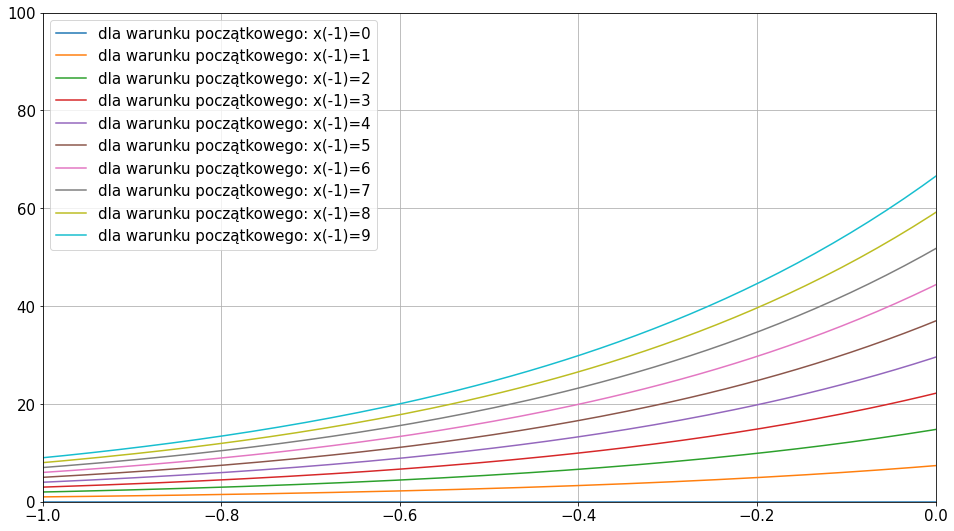

In [5]:
# Pomocniczo wykonujemy wykresy rozwiązań dla kilku warunków początkowych w tym okresie:
xs = np.linspace(-5,5,1000)
for i in range(0,10):  
    sol1 = solution_1.rhs.subs("C1",float(i)/np.exp(-2))  # x(-1)=i
    solsol = np.vectorize(lambdify(t,sol1))
    plt.plot(xs, solsol(xs), label=f"dla warunku początkowego: x(-1)={i}")  # w chwili t=-1 populacja wynosiła i mln osobników
plt.xlim(-1,0)
plt.ylim(0,100)
plt.legend()
plt.grid()

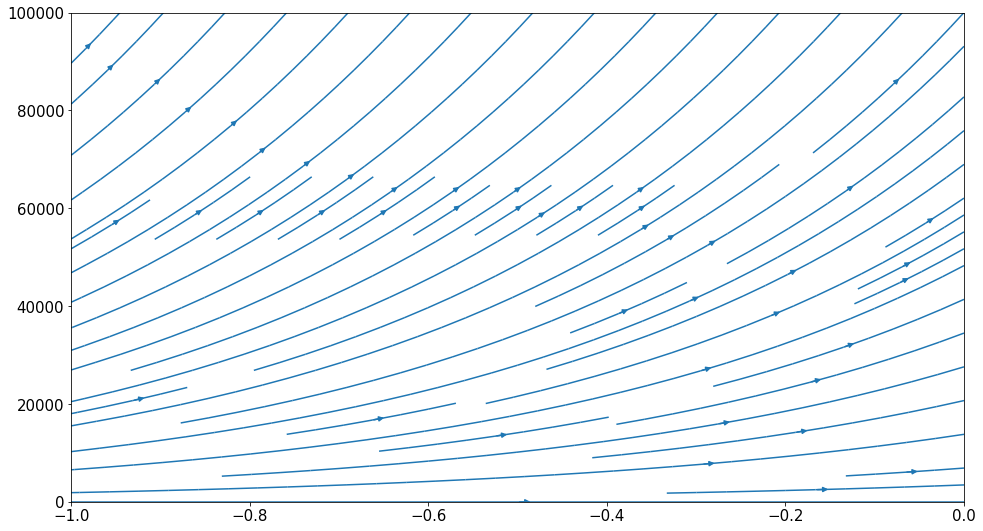

In [6]:
# Rysujemy portret fazowy dla tego przedziału:
T,X = np.meshgrid(np.linspace(-1,0,100), np.linspace(0,100000,100)) 
plt.streamplot(T,X,np.ones(T.shape),2*X)

### Omówienie dynamiki rozwoju populacji w okresie $t \in [-1,0]$: ###

Niezależnie od warunku początkowego w okresie czasu $t \in [-1,0]$ nie występuje ograniczenie dla rozwoju populacji. 

W zależności od warunku początkowego:

* gdy $x(-1)>0$ - populacja rośnie (im większa jest liczebność populacji, tym szybciej);
* gdy $x(-1)=0$ - populacja jest stała, wynosząca zero;
* gdy $x(-1)<0$ - warunek nie jest możliwy (liczba osobników nie może być ujemna).

------------------------------------------------------------------------------------------------------------------------------
### 2. Dla $t\in(0,1)$: ###

In [7]:
t = sp.symbols('t')
x = sp.Function('x')
eq_2 = sp.Eq(
    sp.Derivative(x(t),t),
    2*x(t)*(1-t)+x(t)*t*2*(1-x(t)/7))
eq_2

Eq(Derivative(x(t), t), 2*t*(1 - x(t)/7)*x(t) + 2*(1 - t)*x(t))

In [8]:
solution_2 = sp.dsolve(eq_2)
solution_2

Eq(x(t), 14*exp(2*t)/(C1 + 2*t*exp(2*t) - exp(2*t)))

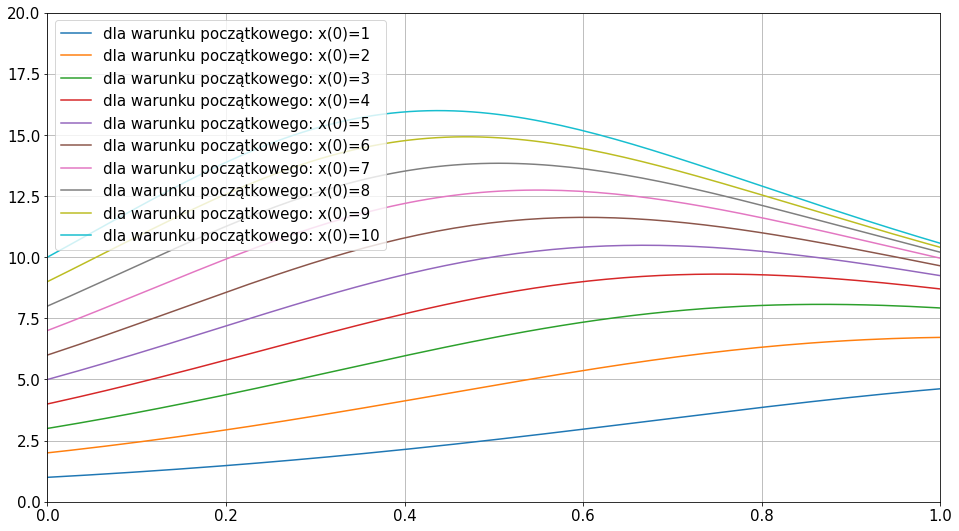

In [10]:
# Pomocniczo wykonujemy wykresy rozwiązań dla kilku warunków początkowych w tym okresie:
xs = np.linspace(-5,5,1000)
for i in range(1,11):  
    sol2 = solution_2.rhs.subs("C1",(14+float(i))/float(i))  # x(0)=i
    solsol = np.vectorize(lambdify(t,sol2))
    plt.plot(xs, solsol(xs), label=f"dla warunku początkowego: x(0)={i}") # w chwili t=0 było {i} mln osobników
plt.xlim(0,1)
plt.ylim(0,20)
plt.legend()
plt.grid()

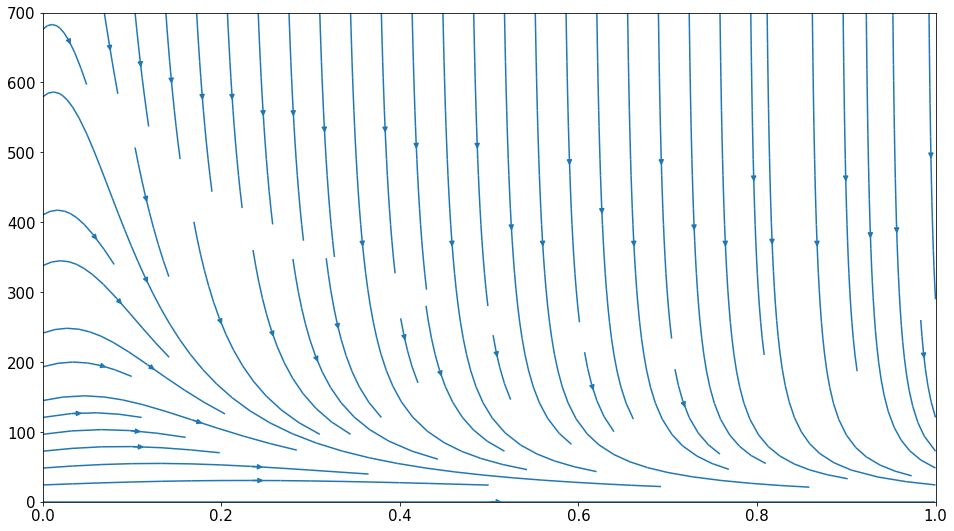

In [11]:
# Rysujemy portret fazowy dla tego przedziału:
T,X = np.meshgrid(np.linspace(0,1,500), np.linspace(0,700,100)) 
plt.streamplot(T,X,np.ones(T.shape),2*X*(1-T)+T*2*X*(1-X/7))

### Omówienie dynamiki rozwoju populacji w okresie $t \in (0,1)$: ###

Przedział $t \in (0,1)$ ma charakter przejściowy. 

W początkowej fazie zauważalny jest niewielki wzrost populacji - im większa była jej liczebność w chwili $t=0$ tym dynamika zmian jest większa. 

Ograniczenie globalnie zaczyna być widoczne mniej więcej od momentu $t=\frac{2}{5}$, lokalnie im większa była populacja w momencie początkowym, tym wcześniej rozpoczął się spadek liczby osobników. 

W fazie końcowej czasu w tym przedziale liczebność poplacji gwałtowanie spada do poziomu ok. 5-10 mln osobników. 

_______________________________________________________________________________________________________________________________
### 3. Dla $t\in[1,2]$: ###

In [12]:
t = sp.symbols('t')
x = sp.Function('x')
eq_3 = sp.Eq(
    sp.Derivative(x(t),t),
    2*x(t)*(1-x(t)/7))
eq_3

Eq(Derivative(x(t), t), 2*(1 - x(t)/7)*x(t))

In [13]:
solution_3 = sp.dsolve(eq_3)
solution_3

Eq(x(t), 7/(C1*exp(-2*t) + 1))

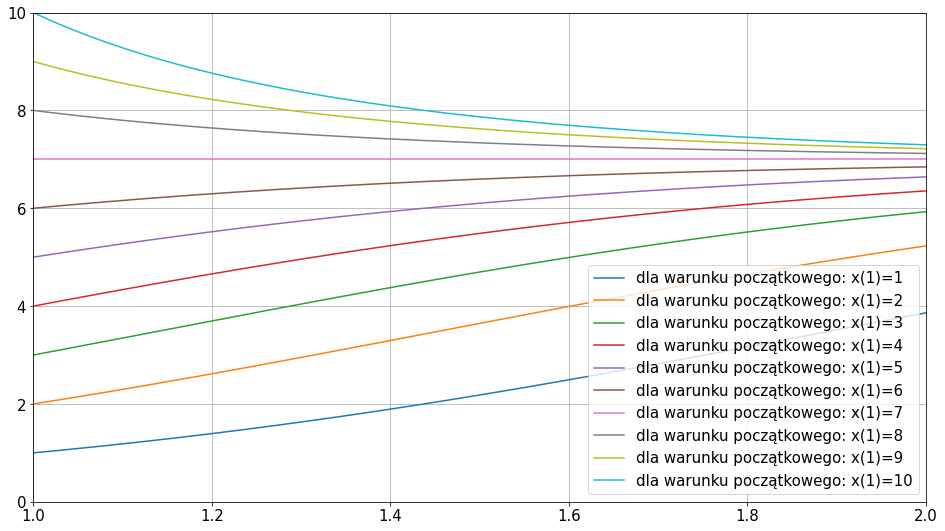

In [14]:
# Pomocniczo wykonujemy wykresy rozwiązań dla kilku warunków początkowych w tym okresie:
xs = np.linspace(-5,5,1000)
for i in range(1,11):  
    sol3 = solution_3.rhs.subs("C1",(7-float(i))/(np.exp(-2)*float(i)))  #x(1)=i
    solsol = np.vectorize(lambdify(t,sol3))
    plt.plot(xs, solsol(xs), label=f"dla warunku początkowego: x(1)={i}")  # w chwili t=1 populacja osobników wynosiła {i} mln
plt.xlim(1,2)
plt.ylim(0,10)
plt.legend()
plt.grid()

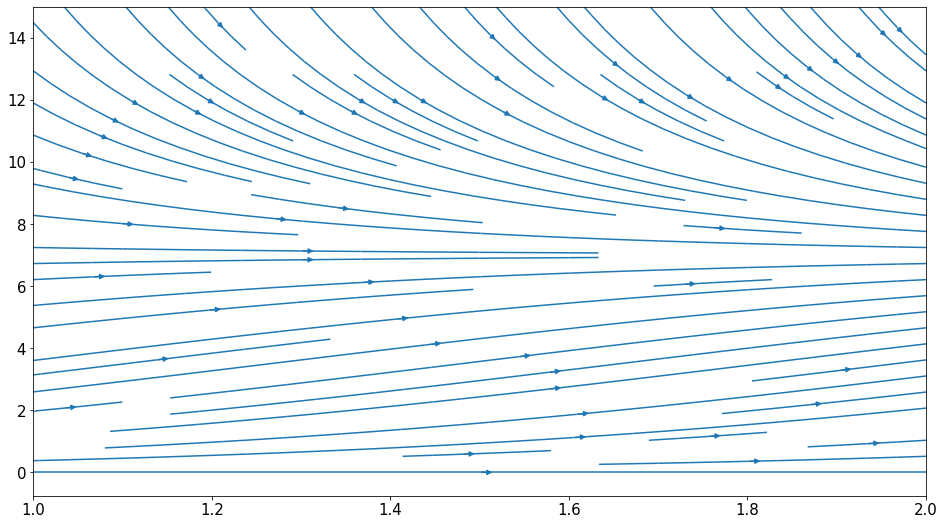

In [19]:
# Rysujemy portret fazowy dla tego przedziału:
T,X = np.meshgrid(np.linspace(1,2,500), np.linspace(0,15,100)) 
plt.streamplot(T,X,np.ones(T.shape),2*X*(1-X/7))

### Omówienie dynamiki rozwoju populacji w okresie $t \in [1,2]$: ###

Na przedziale czasu $t \in [1,2]$ wyraźnie widoczne jest ograniczenie rozwoju populacji - wielkość populacji zbiega do liczbności na poziomie 7 mln. 

W zależności od warunku początkowego:
* gdy populacja w chwili $x(1)<7$, to populacja stopniowo rośnie nie więcej niż do poziomu 7 mln osobników;
* gdy populacja w chwili $x(1)=7$, to populacja jest stała;
* gdy populacja w chwili $x(1)>7$, to populacja maleje do poziomu nie mniejszego niż 7 mln osobników.

_______________________________________________________________________________________________________________________________
### 4. Dla całego przedziału $t\in[-1,2]$: ###

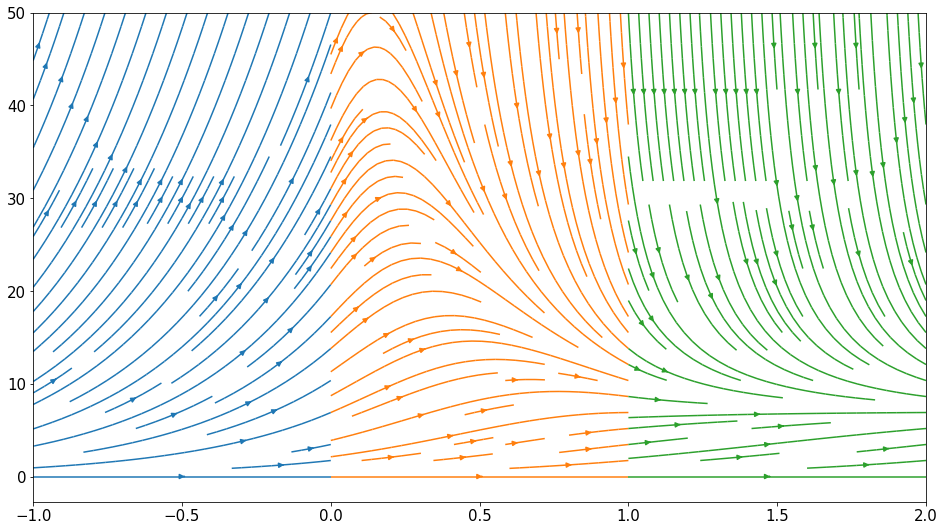

In [20]:
# Rysujemy portret fazowy strumieniowy dla całego przedziału:
T,X = np.meshgrid(np.linspace(-1,0,100), np.linspace(0,50,100)) 
plt.streamplot(T,X,np.ones(T.shape),2*X)

T,X = np.meshgrid(np.linspace(0,1,100), np.linspace(0,50,100)) 
plt.streamplot(T,X,np.ones(T.shape),2*X*(1-T)+T*2*X*(1-X/7))

T,X = np.meshgrid(np.linspace(1,2,100), np.linspace(0,50,100)) 
plt.streamplot(T,X,np.ones(T.shape),2*X*(1-X/7))

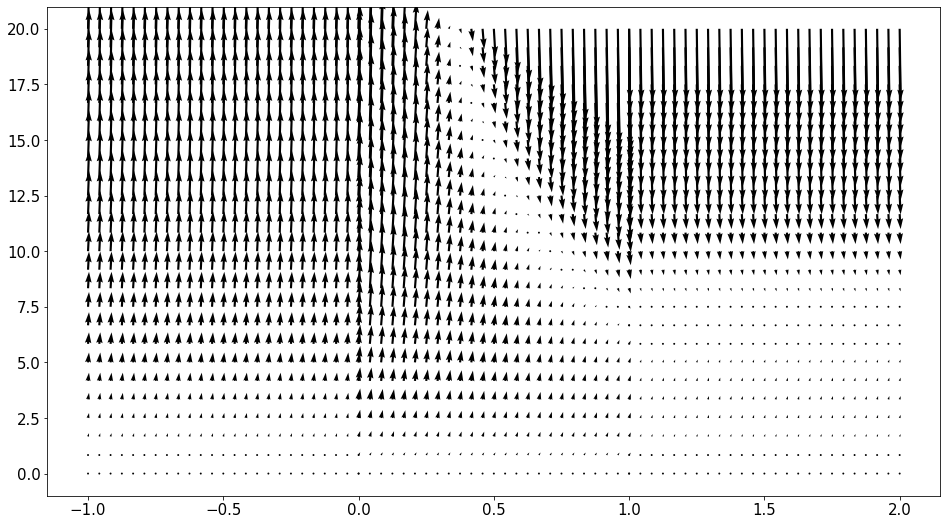

In [21]:
# Rysujemy pole wektorowe dla całego przedziału:
T,X = np.meshgrid(np.linspace(-1,0,25), np.linspace(0,20,25))
plt.quiver(T,X,np.ones(T.shape),2*X)

T,X = np.meshgrid(np.linspace(0,1,25), np.linspace(0,20,25))
plt.quiver(T,X,np.ones(T.shape),2*X*(1-T)+T*2*X*(1-X/7))

T,X = np.meshgrid(np.linspace(1,2,25), np.linspace(0,20,25))
plt.quiver(T,X,np.ones(T.shape),2*X*(1-X/7))

### Opis rozwoju populacji w całym okresie $t \in [-1,2]$: ###

Analizując łącznie cały przedział $t \in [-1,2]$ można zauważyć, że jeżeli w momencie początkowym $t=-1$ liczebność populacji wynosiła 0, to pozostała ona stała przez cały badany okres. 

Ponadto do momentu ok. $t=\frac{1}{2}$ zauważalny jest zdecydowany wzrost populacji niezależnie od warunku początkowego (im większa jest liczebność populacji tym jest on bardziej widoczny), natomiast dla $t>\frac{1}{2}$ zaczyna być zauważalne zróżnicowanie - im większa jest liczbność populacji w stosunku do poziomu 7 mln (większa wartość warunku początkowego) tym spadek liczebności populacji zaczyna być wcześniej dostrzegalny. 

W końcowej części omawianego przedziału widoczna jest prawidłowość - wystąpienie bariery: jeśli wartość populacji w chwili $t\in[1,2]$ jest mniejsza od 7 mln to stopniowo rośnie do tej wartości i jej nie przekroczy, natomiast jeśli jest większa od 7 mln to gwałtownie do niej spada.